<a href="https://colab.research.google.com/github/amnarafique/Django-another/blob/master/Regression(3)_pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# larger datasets

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_one_hot= pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


# creating x and y (features and labels)

In [ ]:
x = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot["charges"]
x.head(), y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
len(x), len(x_train),len(y_test)

(1338, 1070, 268)

In [ ]:
x_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [ ]:
x_train.shape

(1070, 11)

## creating model to learn relations bw x and y


# **Model:1**

In [ ]:
tf.random.set_seed(42)


insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[None, 1070,11]),
    tf.keras.layers.Dense(1)
])

insurance_model_1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])


insurance_model_1.fit(x_train, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8612.4736 - mae: 8612.4736
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7883.5054 - mae: 7883.5054
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7582.3540 - mae: 7582.3540
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7695.6016 - mae: 7695.6016
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7733.9653 - mae: 7733.9653
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7572.8325 - mae: 7572.8325
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7633.2949 - mae: 7633.2949
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7741.4658 - mae: 7741.4658
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7573.6182 - mae: 7573.6182
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7767.3306 - mae: 7767.3306

# evaluating

In [ ]:
insurance_model_1.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6163.1890 - mae: 6163.1890


[6163.18896484375, 6163.18896484375]

# improving our model
1. adding extra layer
2. training it for longer


# **Model:2**

In [ ]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[None, 1070,11 ]),
    tf.keras.layers.Dense(10, input_shape=[None,1070,11]),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"])

final = insurance_model_2.fit(x_train, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13296.2930 - mae: 13296.2930
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13130.6328 - mae: 13130.6328
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12794.4561 - mae: 12794.4561
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12129.7715 - mae: 12129.7715
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11007.7959 - mae: 11007.7959
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9566.8945 - mae: 9566.8945
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8231.5537 - mae: 8231.5537
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7564.9478 - mae: 7564.9478
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7447.9336 - mae: 7447.9336
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7426.5908 - mae:

# **Model:3**

In [ ]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[None, 1070,11 ]),
    tf.keras.layers.Dense(10, input_shape=[None,1070,11]),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"])

final = insurance_model_3.fit(x_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13280.7256 - mae: 13280.7256
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13086.4531 - mae: 13086.4531
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12701.5908 - mae: 12701.5908
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 11974.6221 - mae: 11974.6221
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10793.3916 - mae: 10793.3916
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9336.2129 - mae: 9336.2129
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8055.7964 - mae: 8055.7964
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7506.6187 - mae: 7506.6187
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7423.9556 - mae: 7423.9556
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7404.4375 - mae:

Text(0, 0.5, 'loss')

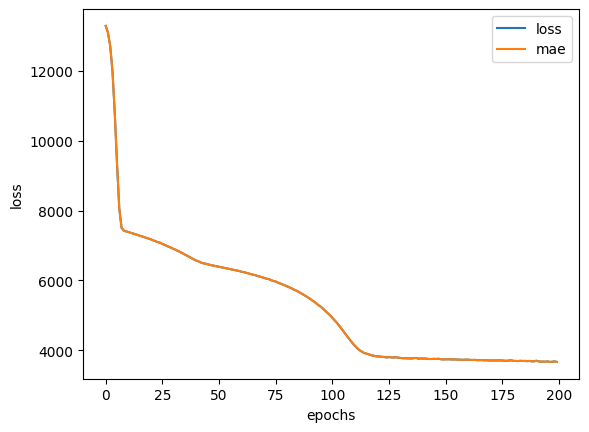

In [ ]:
pd.DataFrame(final.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

<Axes: ylabel='Frequency'>

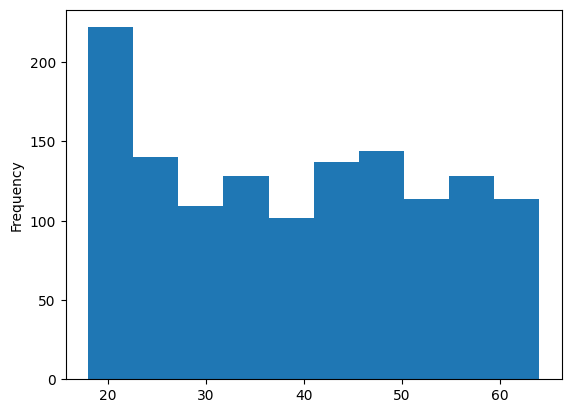

In [ ]:
x["age"].plot(kind="hist")

# creating column transformer

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]
    ))

#create x and y

x = insurance.drop("charges", axis=1)
y = insurance["charges"]

#build our train and test sets

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)

#fit the column transformer to our trainig data
ct.fit(x_train)

x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

x_train.loc[0], x_train_normal[0]


(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [ ]:
# create the model

#x_train = tf.constant(x_train)
#y_train = tf.constant(y_train)

tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[None, 1070,11 ]),
    tf.keras.layers.Dense(10, input_shape=[None,1070,11]),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_4.fit(x_train_normal,y_train, epochs=200)

# **Evaluate the model**

In [ ]:
insurance_model_4.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3170.1650 - mae: 3170.1650


[3170.1650390625, 3170.1650390625]